<a href="https://colab.research.google.com/github/Hari569/DS/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ROAD ACCIDENT ANALYSIS

OBJECTIVE : To develop a machine learning model that could predict the severity of accidents

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/ml/RTA Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [ ]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

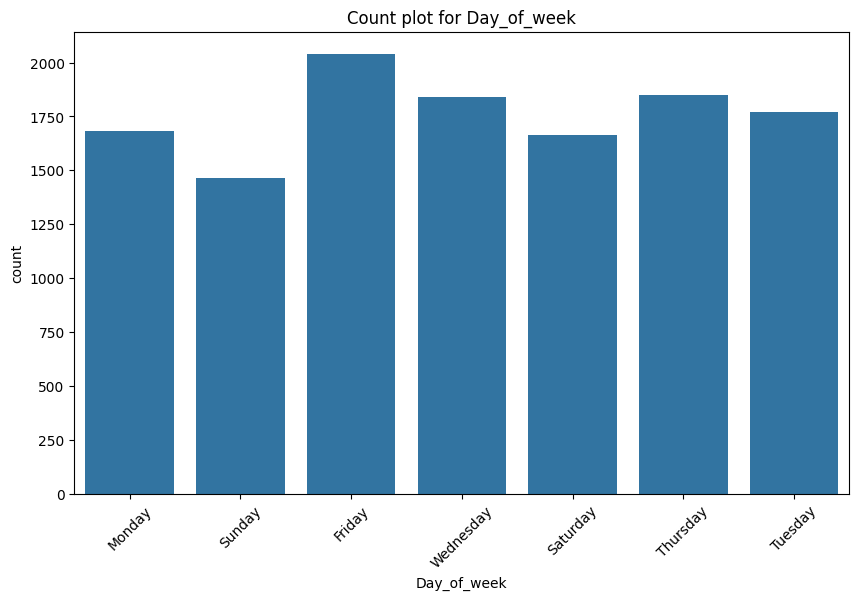

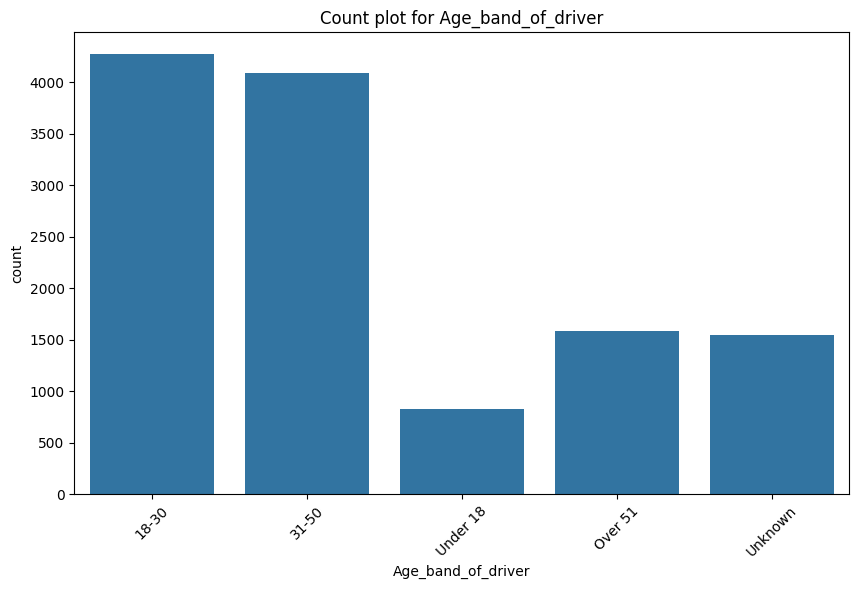

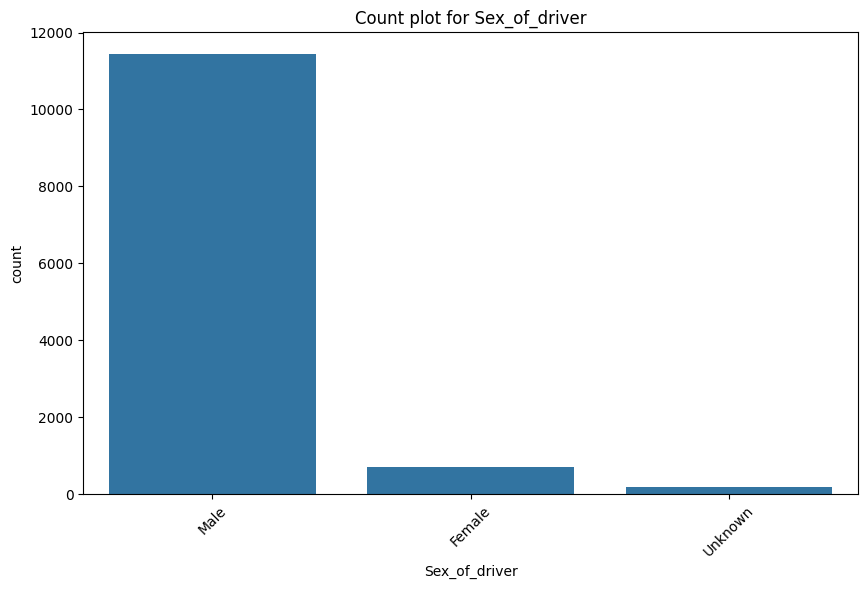

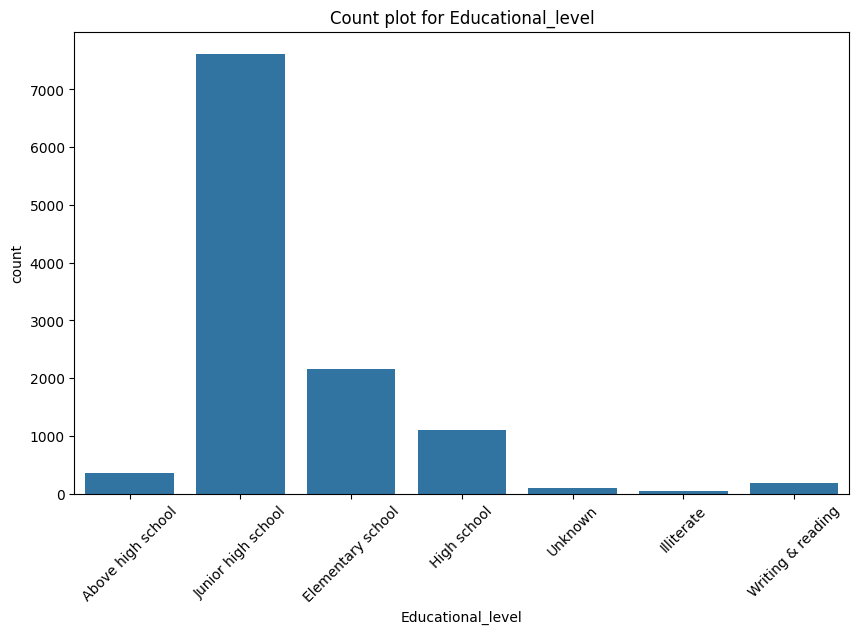

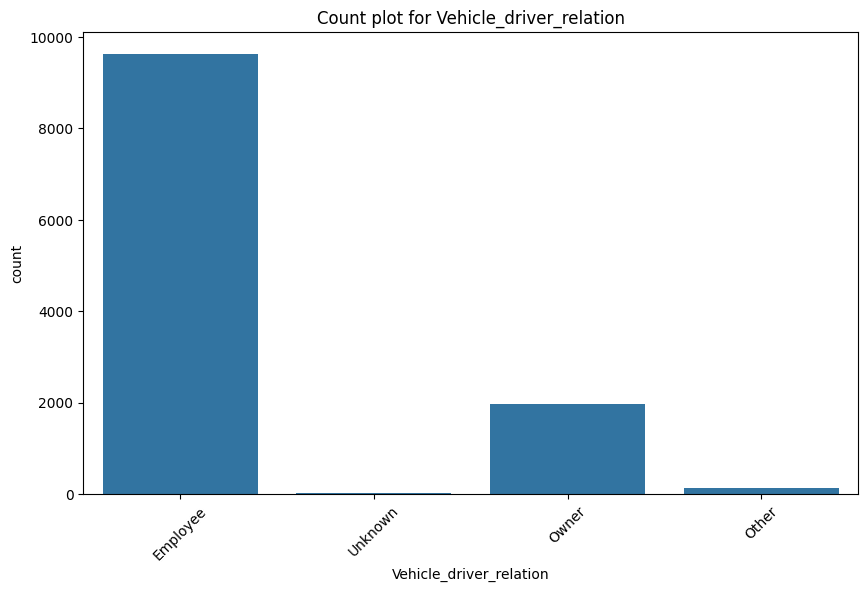

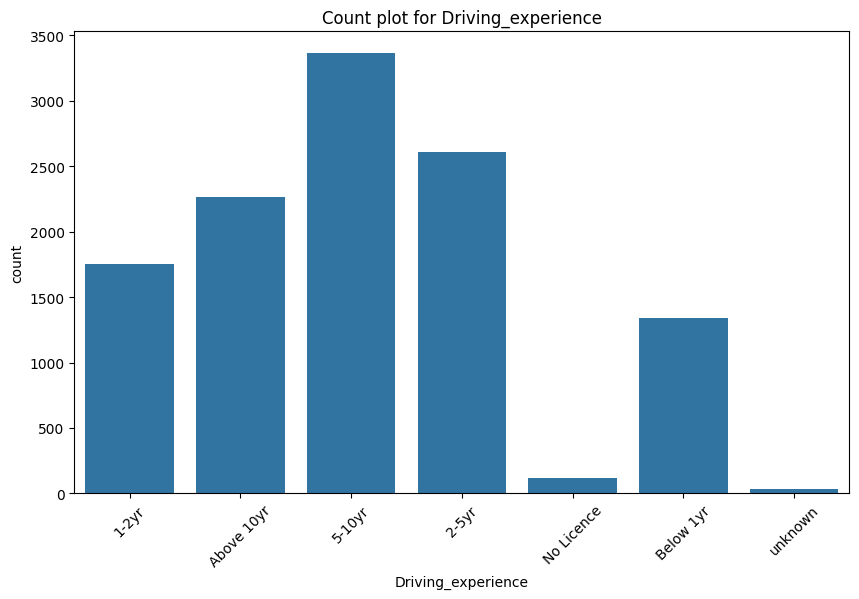

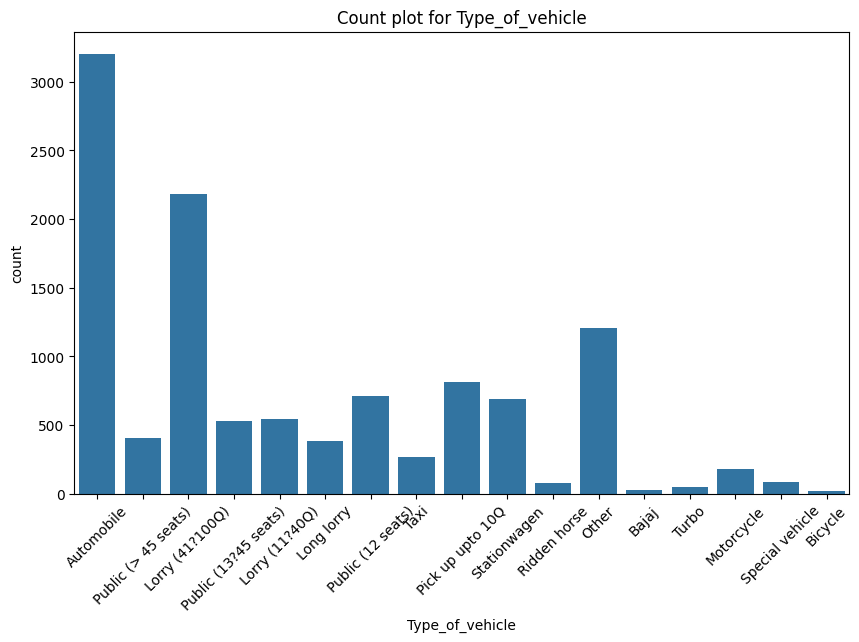

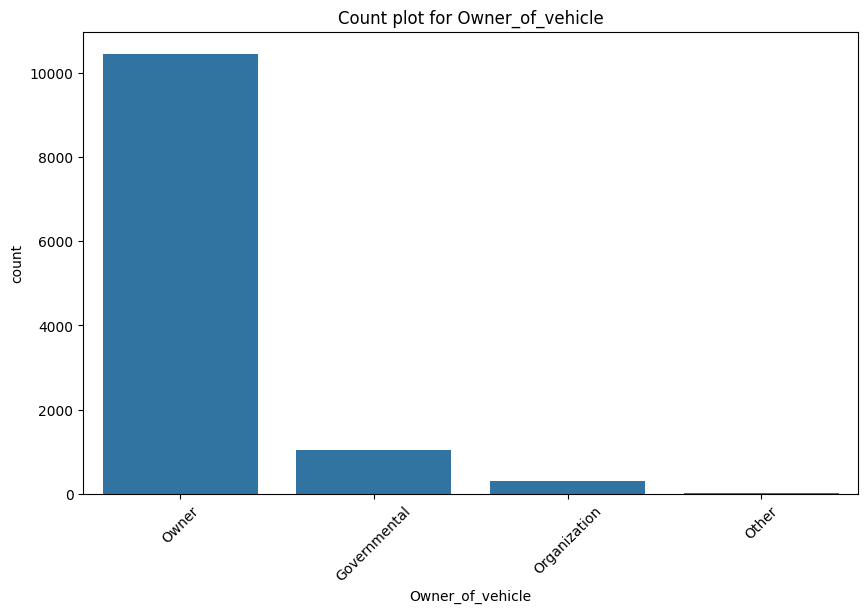

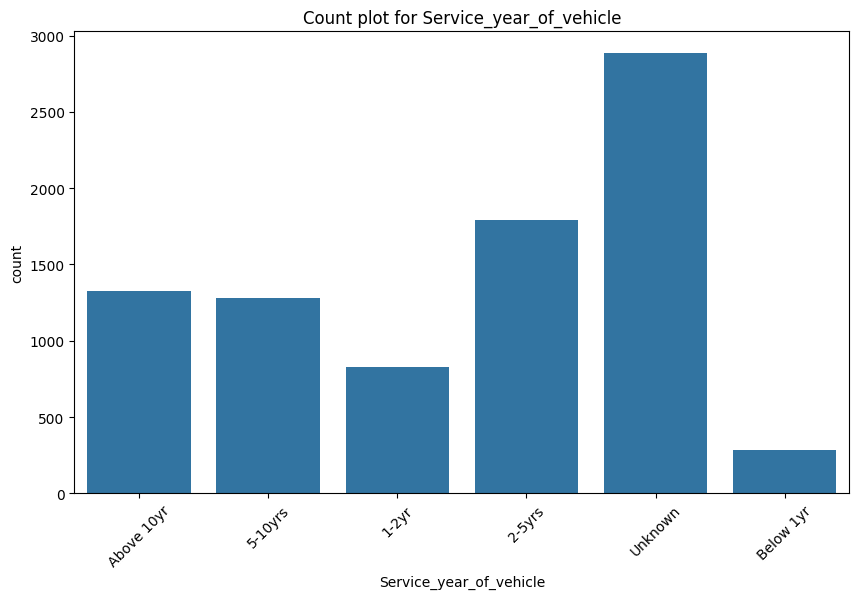

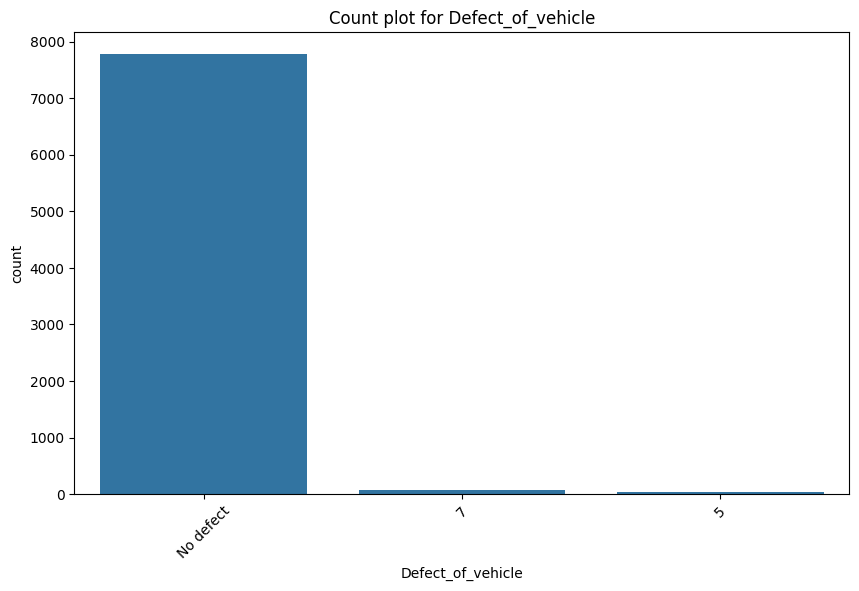

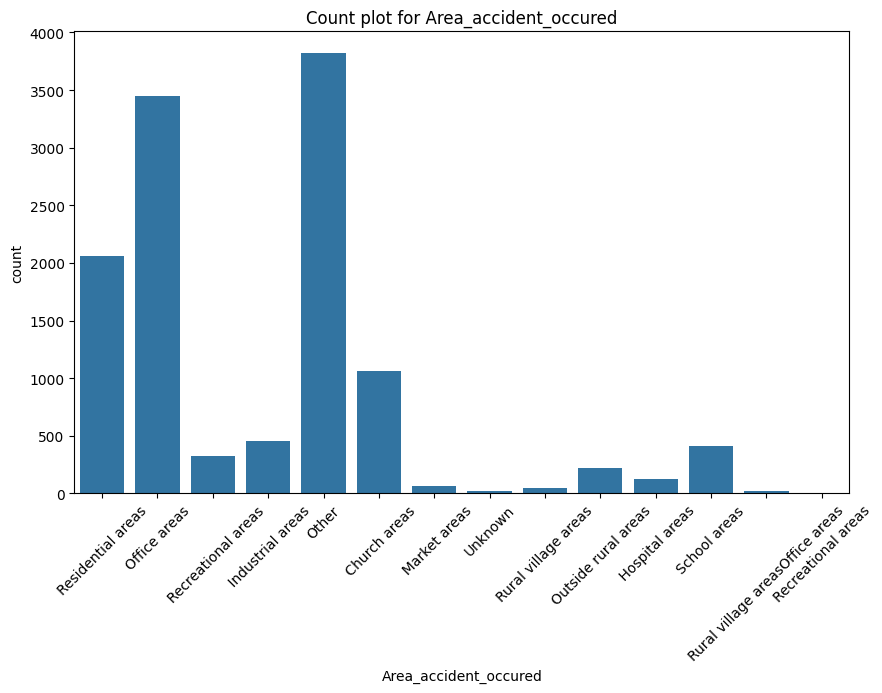

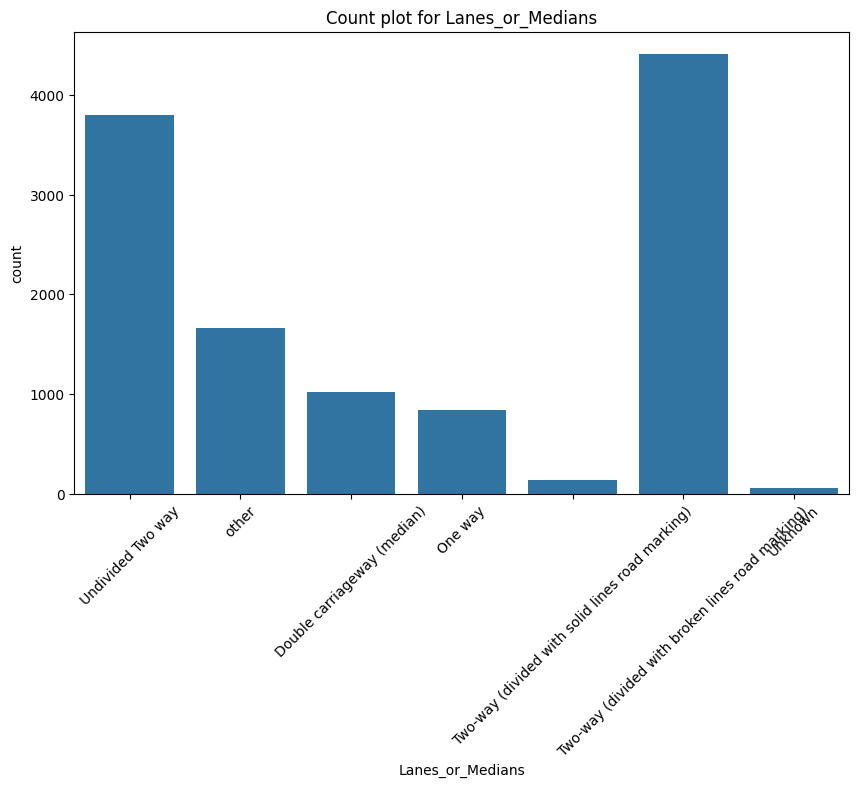

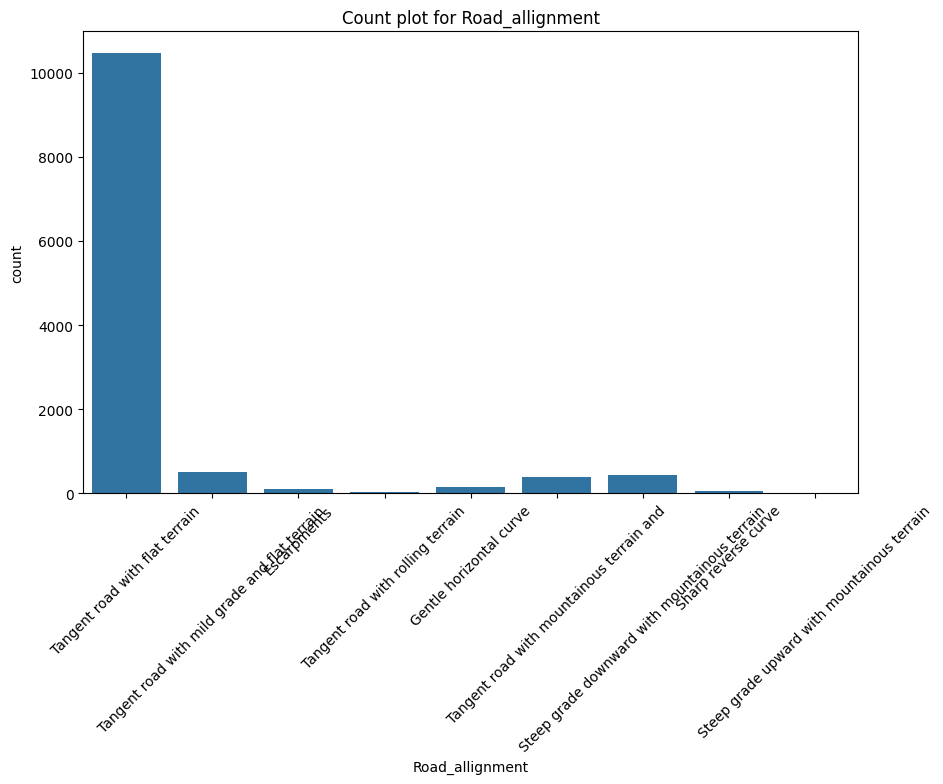

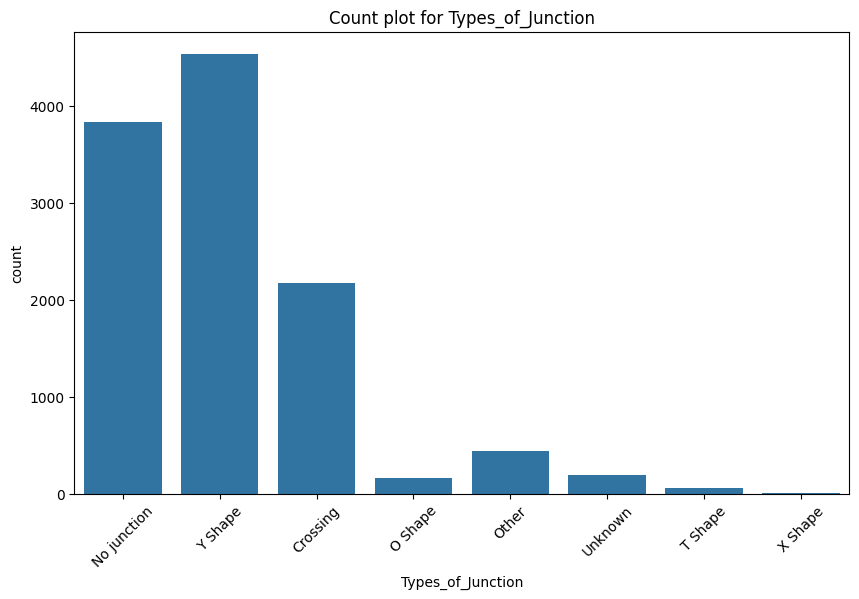

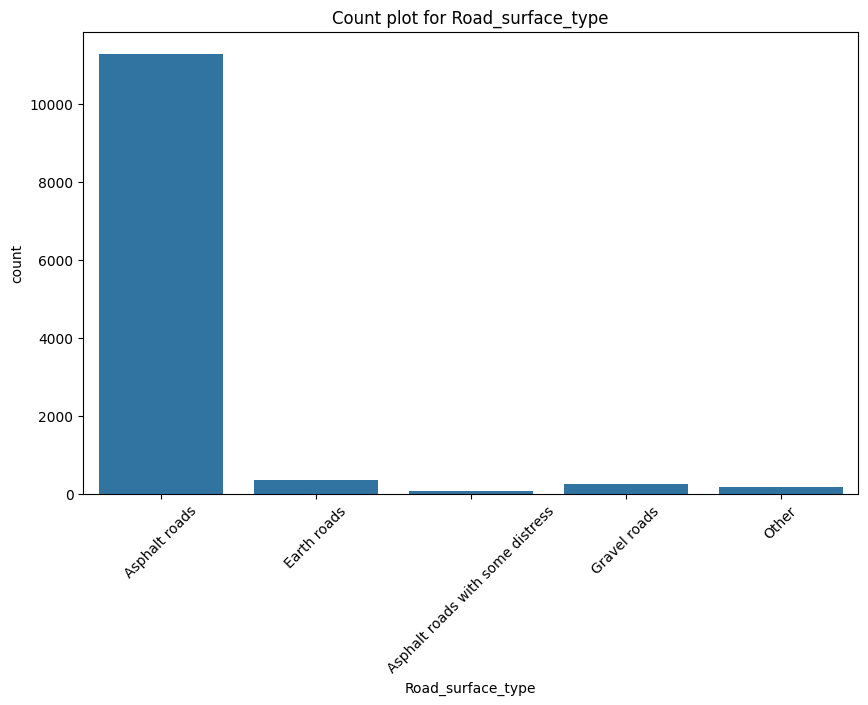

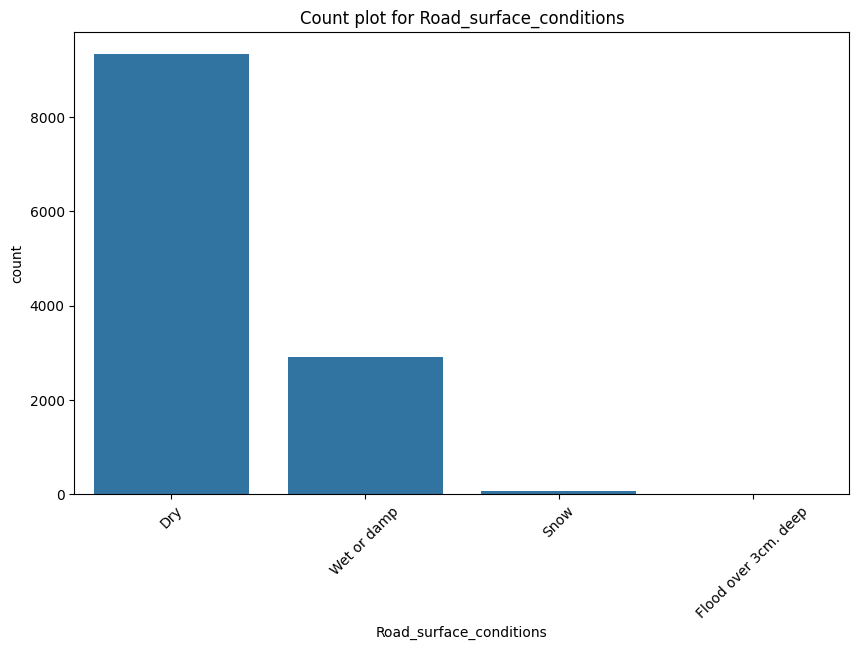

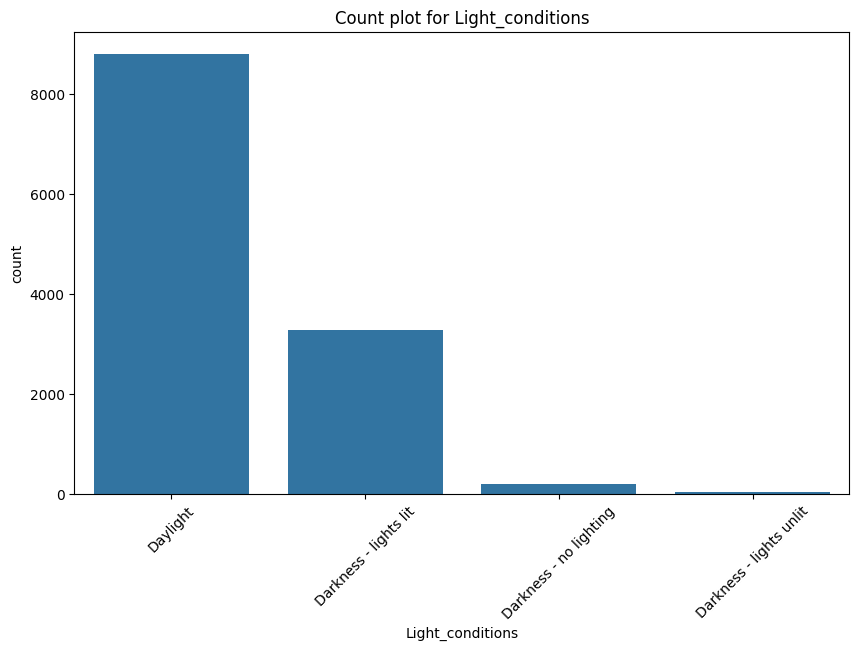

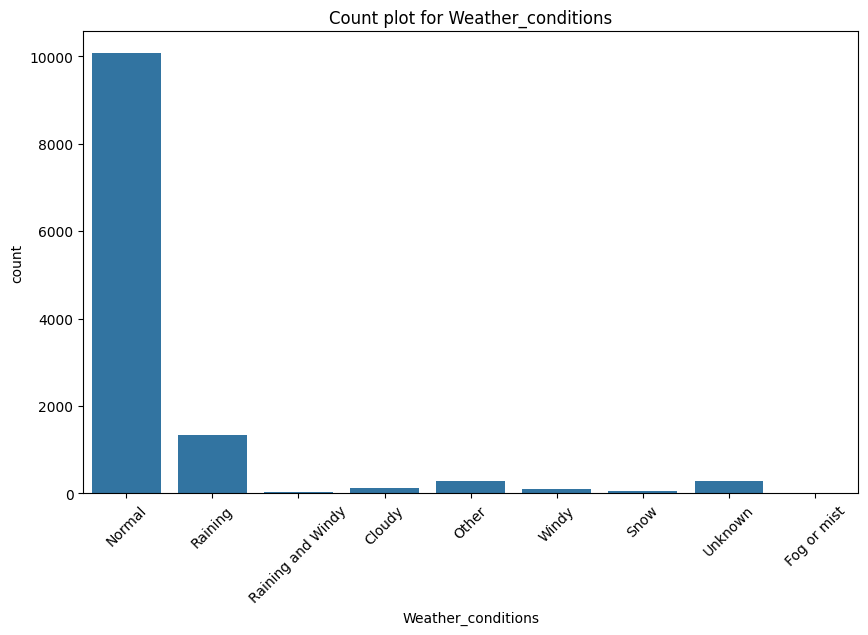

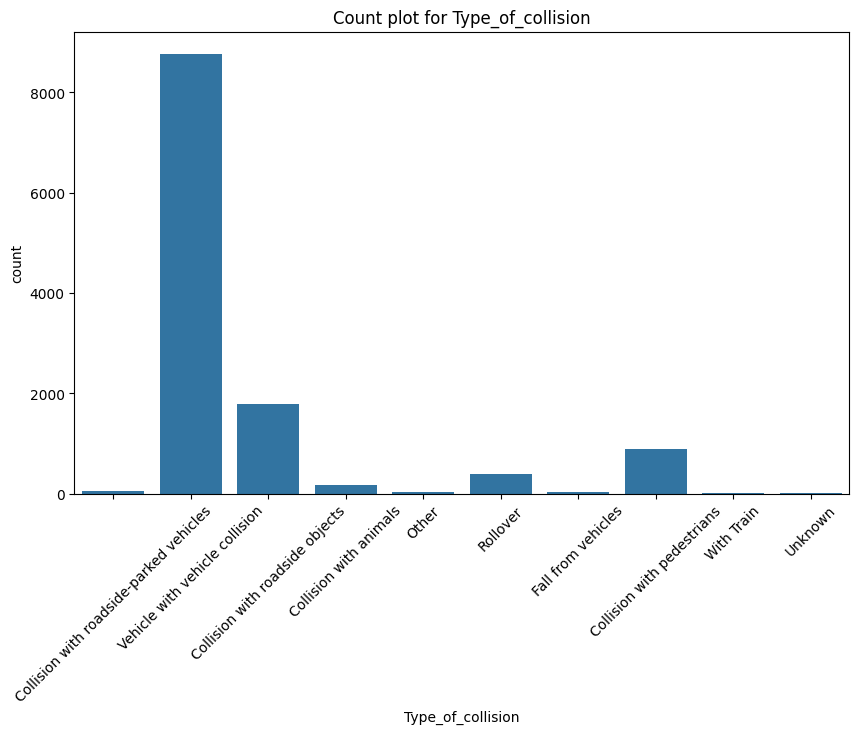

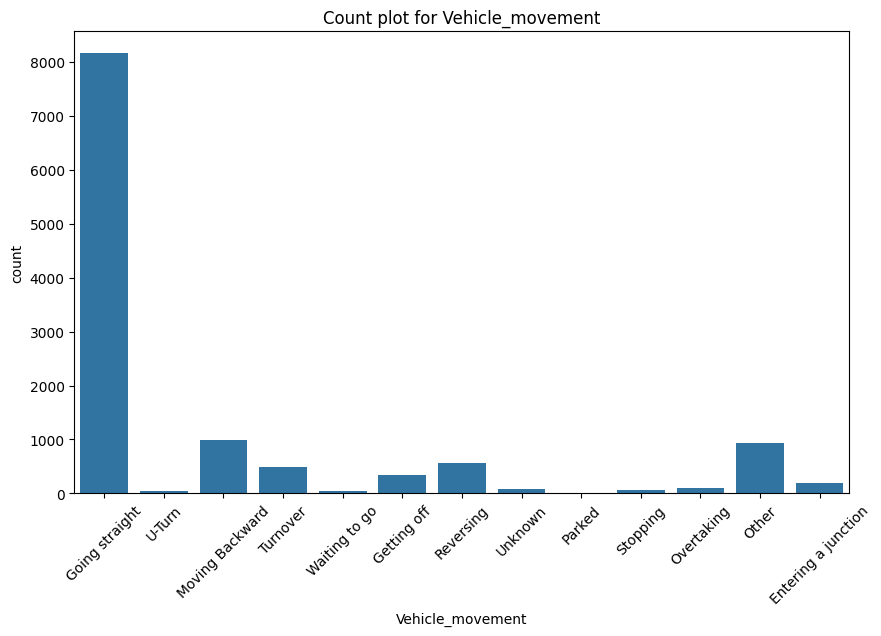

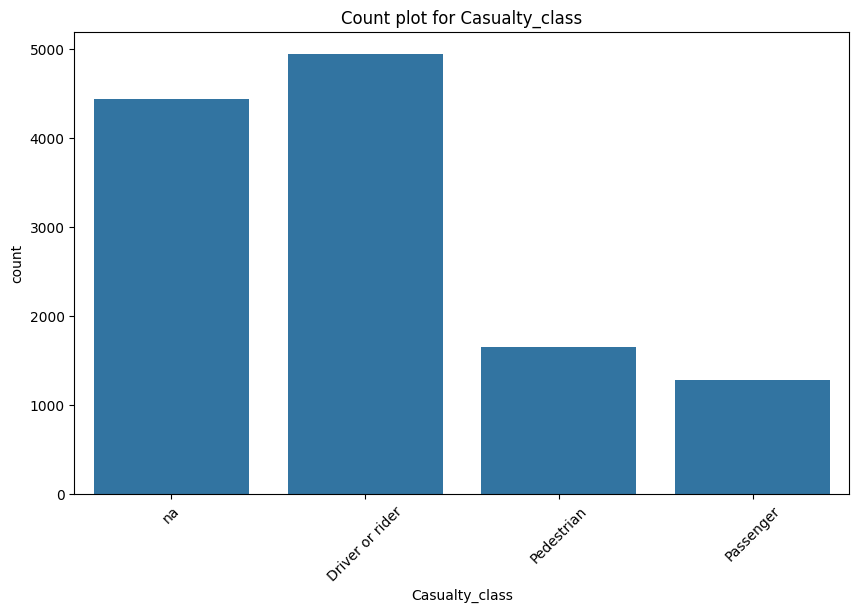

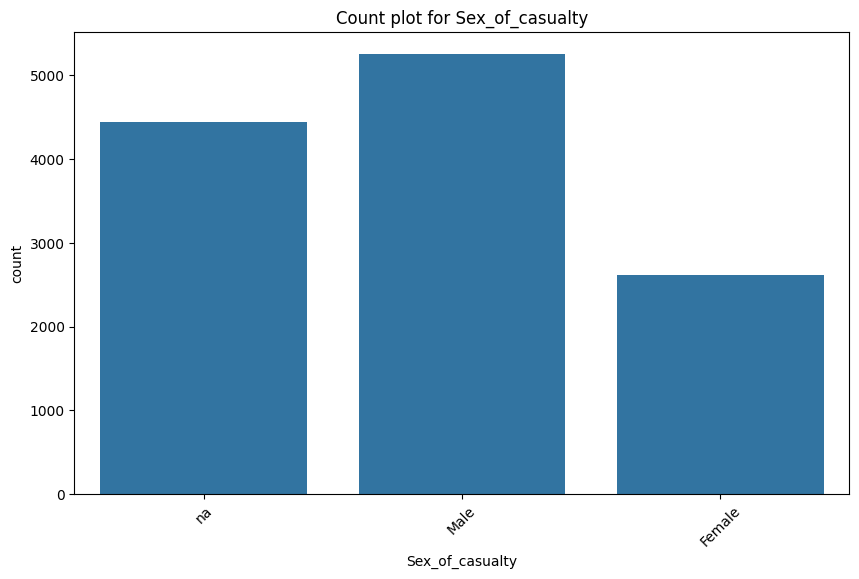

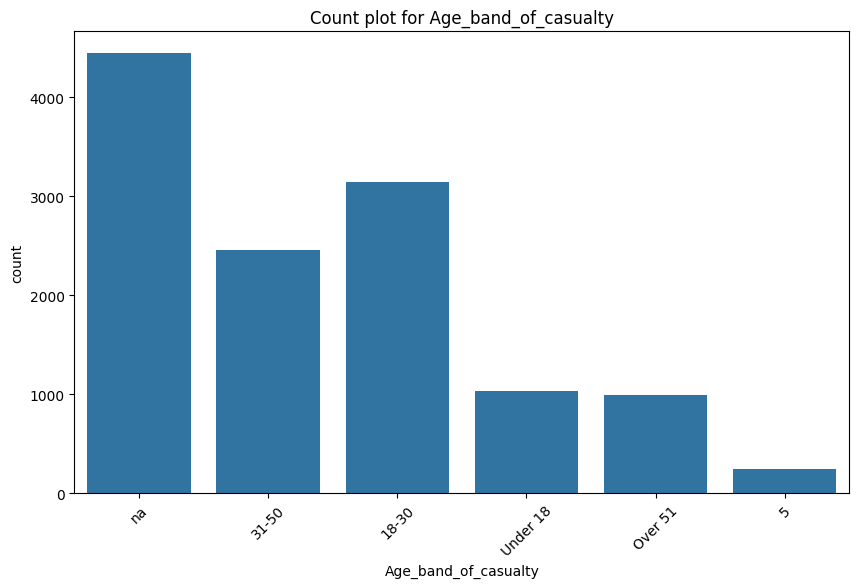

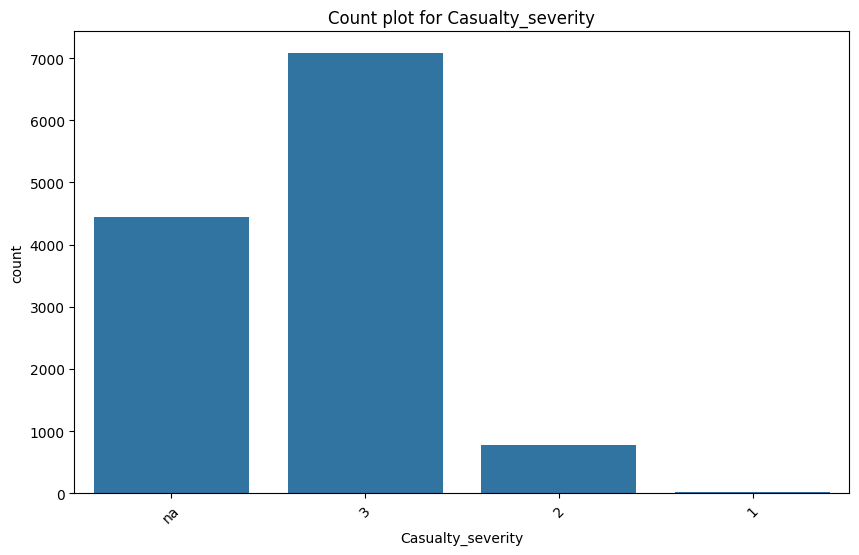

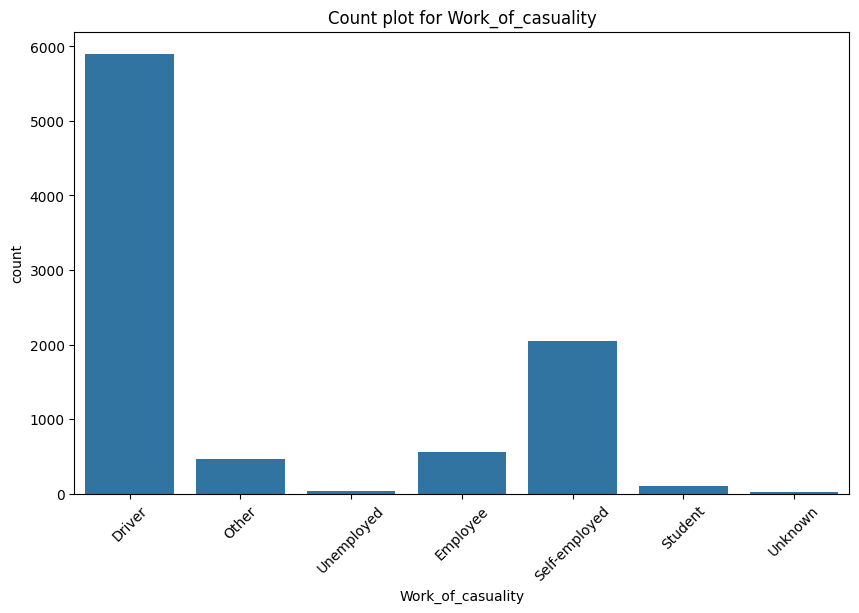

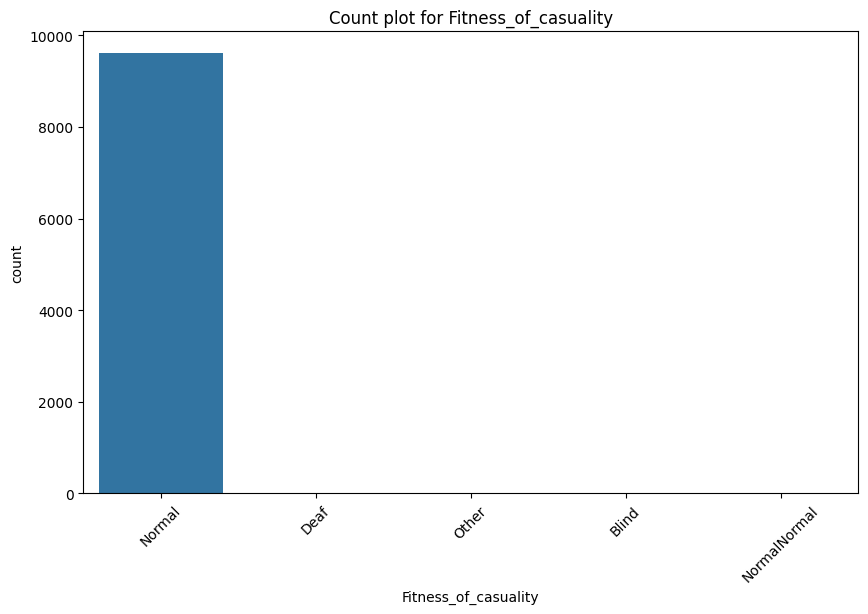

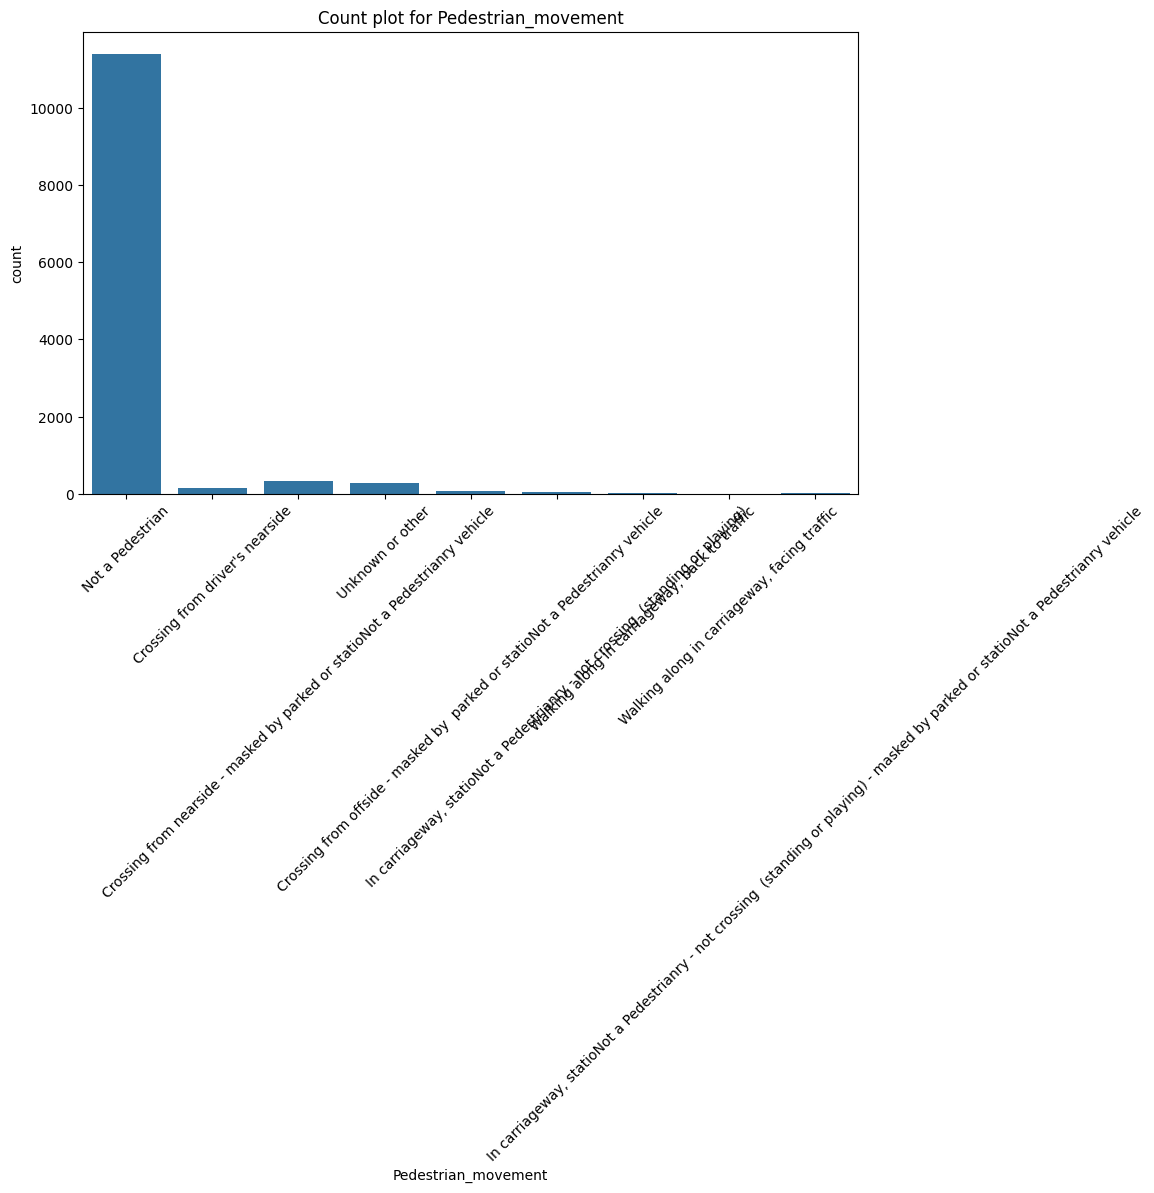

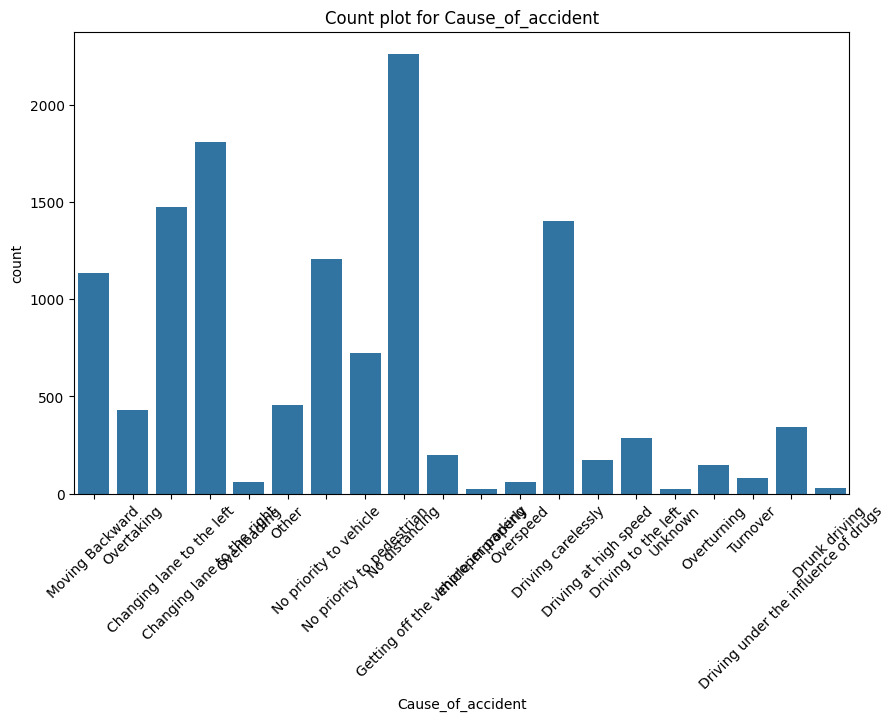

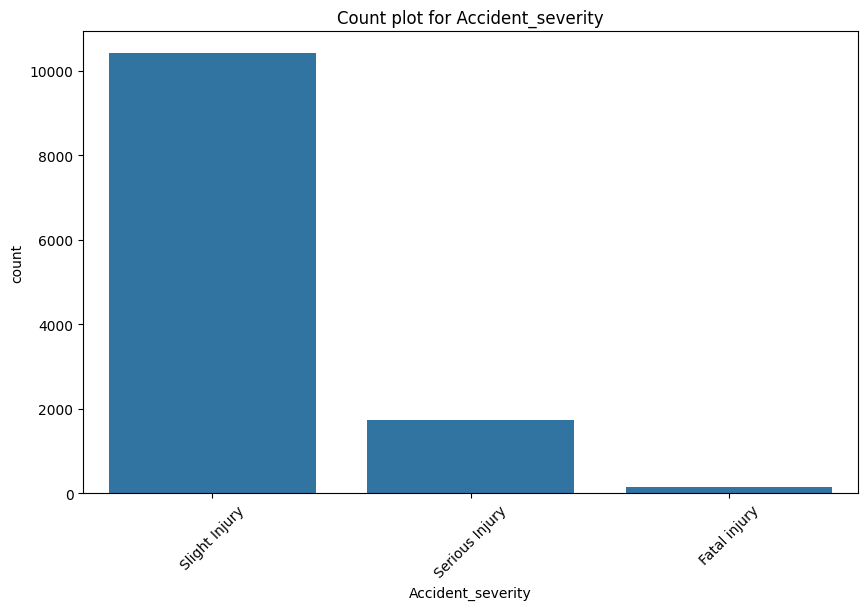

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_categorical = df[['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity']]

for column in df_categorical.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_categorical)
    plt.title(f'Count plot for {column}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
df.drop(['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality'], axis=1, inplace=True)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
df['Driving_experience'].value_counts()




Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

In [ ]:
df['Sex_of_driver'].value_counts()

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

<ipython-input-195-0cc198f5e5af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex_of_driver', palette='viridis')


Text(0, 0.5, 'Count')

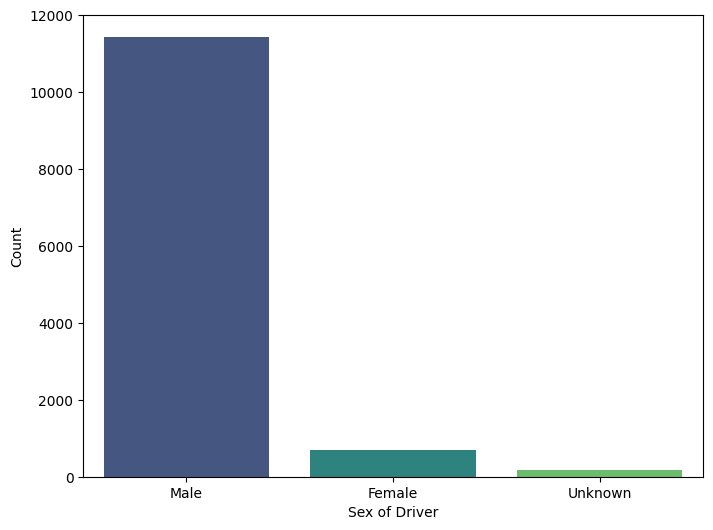

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex_of_driver', palette='viridis')
plt.xlabel('Sex of Driver')
plt.ylabel('Count')



In [ ]:
df['Type_of_vehicle'].value_counts()


Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [ ]:
df['Age_band_of_driver'].value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

<ipython-input-198-869761aa60d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_band_of_driver', palette='viridis')


Text(0, 0.5, 'Count')

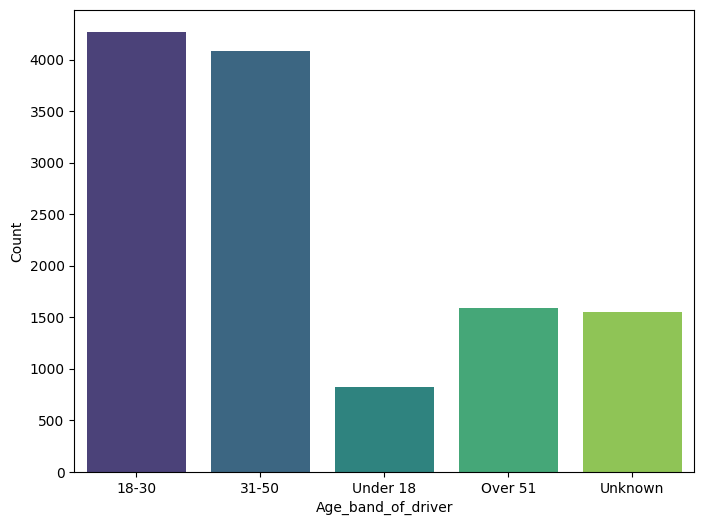

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age_band_of_driver', palette='viridis')
plt.xlabel('Age_band_of_driver')
plt.ylabel('Count')


In [ ]:
lst = ['Educational_level', 'Vehicle_driver_relation', 'Driving_experience','Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured','Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement']

for i in lst:
    df[i].fillna(df[i].mode()[0], inplace=True)


In [ ]:
df.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [ ]:
df['Day_of_week'].value_counts()

Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64

In [ ]:
df['Day_of_week'] = df['Day_of_week'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,'Thursday': 3, 'Friday': 4, 'Saturday': 5,'Sunday': 6})

In [ ]:
df['Age_band_of_driver'].value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [ ]:
df['Age_band_of_driver'] = df['Age_band_of_driver'].map({'Unknown': -1, 'Under 18': 0,'18-30': 1, '31-50': 2, 'Over 51': 3})

In [ ]:
df['Educational_level'].value_counts()

Educational_level
Junior high school    8360
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

In [ ]:
df['Educational_level'] = df['Educational_level'].map({'Unknown': -1, 'Illiterate': 0,'Writing & reading': 1, 'Elementary school': 2,'Junior high school': 3, 'High school': 4,'Above high school': 5})

In [ ]:
df['Age_band_of_casualty'].value_counts()

Age_band_of_casualty
na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64

In [ ]:
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('5', 'Under 18').replace('na', 'Unknown')
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].map({'Unknown': -1, 'Under 18': 0,'18-30': 1, '31-50': 2, 'Over 51': 3})

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df.drop('Time', axis=1, inplace=True)

<ipython-input-209-91cf847940c6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [ ]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace({'Lorry (41?100Q)': 'Lorry',
                                                   'Lorry (11?40Q)': 'Lorry',
                                                   'Long lorry': 'Lorry',
                                                   'Pick up upto 10Q': 'Lorry',
                                                   'Public (12 seats)': 'Public',
                                                   'Public (13?45 seats)': 'Public',
                                                   'Public (> 45 seats)': 'Public',
                                                   'Bajaj': 'Auto'
                                                  })

In [ ]:
lst2=['Sex_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
        'Type_of_vehicle', 'Owner_of_vehicle','Area_accident_occured', 'Lanes_or_Medians',
        'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
        'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
        'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
        'Sex_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident']
for i in lst2:
  print(df[i].value_counts())

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64
Vehicle_driver_relation
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: count, dtype: int64
Driving_experience
5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64
Type_of_vehicle
Automobile         4155
Lorry              3921
Public             1647
Other              1208
Stationwagen        687
Taxi                265
Motorcycle          177
Special vehicle      84
Ridden horse         76
Turbo                46
Auto                 29
Bicycle              21
Name: count, dtype: int64
Owner_of_vehicle
Owner           10941
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64
Area_accident_occured
Other                              4058
Office areas                       3451
Residential areas                  2060
 Churc

In [ ]:
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('na', 'Unknown')
df['Casualty_class'] = df['Casualty_class'].replace('na', 'Unknown')


In [ ]:
from sklearn.preprocessing import LabelEncoder
end = LabelEncoder()
lst1 = ['Sex_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
        'Type_of_vehicle', 'Owner_of_vehicle','Area_accident_occured', 'Lanes_or_Medians',
        'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
        'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
        'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
        'Sex_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident']

for i in lst1:
    df[i] = end.fit_transform(df[i])



In [ ]:
df.dtypes

Day_of_week                     int64
Age_band_of_driver              int64
Sex_of_driver                   int64
Educational_level               int64
Vehicle_driver_relation         int64
Driving_experience              int64
Type_of_vehicle                 int64
Owner_of_vehicle                int64
Area_accident_occured           int64
Lanes_or_Medians                int64
Road_allignment                 int64
Types_of_Junction               int64
Road_surface_type               int64
Road_surface_conditions         int64
Light_conditions                int64
Weather_conditions              int64
Type_of_collision               int64
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement                int64
Casualty_class                  int64
Sex_of_casualty                 int64
Age_band_of_casualty            int64
Casualty_severity               int64
Pedestrian_movement             int64
Cause_of_accident               int64
Accident_sev

In [ ]:
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Minute
0,0,1,1,5,0,0,1,3,9,2,...,2,3,2,-1,3,5,9,Slight Injury,17,2
1,0,2,1,3,0,3,6,3,6,4,...,2,3,2,-1,3,5,16,Slight Injury,17,2
2,0,1,1,3,0,0,3,3,1,6,...,2,0,1,2,2,5,0,Serious Injury,17,2
3,6,1,1,3,0,2,6,0,6,6,...,2,2,0,1,2,5,1,Slight Injury,1,6
4,6,1,1,3,0,1,1,3,4,6,...,2,3,2,-1,3,5,16,Slight Injury,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,2,1,3,0,1,3,3,5,4,...,2,3,2,-1,3,5,10,Slight Injury,16,15
12312,6,-1,1,2,0,2,1,3,5,2,...,4,3,2,-1,3,5,10,Slight Injury,18,0
12313,6,3,1,3,0,2,0,3,5,2,...,4,0,1,2,2,5,1,Serious Injury,13,55
12314,6,1,0,3,0,3,3,3,6,4,...,4,3,2,-1,3,5,5,Slight Injury,13,55


In [ ]:
x = df.drop("Accident_severity", axis=1).values
x


array([[ 0,  1,  1, ...,  9, 17,  2],
       [ 0,  2,  1, ..., 16, 17,  2],
       [ 0,  1,  1, ...,  0, 17,  2],
       ...,
       [ 6,  3,  1, ...,  1, 13, 55],
       [ 6,  1,  0, ...,  5, 13, 55],
       [ 6,  1,  1, ...,  1, 13, 55]])

In [ ]:

y = df["Accident_severity"].values
y


array(['Slight Injury', 'Slight Injury', 'Serious Injury', ...,
       'Serious Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 2,  2,  1, ...,  0,  7, 20],
       [ 2,  2,  1, ..., 16,  6,  9],
       [ 6, -1,  0, ...,  3,  6,  0],
       ...,
       [ 2,  2,  1, ...,  9, 12, 19],
       [ 3,  3,  1, ..., 10,  8, 55],
       [ 4,  2,  1, ...,  0,  8, 51]])

In [ ]:
y_train

array(['Slight Injury', 'Serious Injury', 'Serious Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_train

array([[0.33333333, 0.75      , 0.5       , ..., 0.        , 0.30434783,
        0.33898305],
       [0.33333333, 0.75      , 0.5       , ..., 0.84210526, 0.26086957,
        0.15254237],
       [1.        , 0.        , 0.        , ..., 0.15789474, 0.26086957,
        0.        ],
       ...,
       [0.33333333, 0.75      , 0.5       , ..., 0.47368421, 0.52173913,
        0.3220339 ],
       [0.5       , 1.        , 0.5       , ..., 0.52631579, 0.34782609,
        0.93220339],
       [0.66666667, 0.75      , 0.5       , ..., 0.        , 0.34782609,
        0.86440678]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier(criterion='entropy')
knn=KNeighborsClassifier(n_neighbors=7)
base=MultinomialNB()
svv=SVC()
lst=[knn,base,svv,dt,rf]

accuracy_scores = []
model_names = []

In [ ]:
for i in lst:
  print("model is:",i)
  i.fit(x_train,y_train)
  print("pred")
  y__pred=i.predict(x_test)
  print("prediction result is......")
  print(y__pred)
  print("confusion matrix is.....")
  print(confusion_matrix(y_test,y__pred))
  print("Accuracy score is.......")
  print(accuracy_score(y_test,y__pred))
  print("classification")
  print(classification_report(y_test,y__pred))
  accuracy = accuracy_score(y_test, y__pred)
  accuracy_scores.append(accuracy)
  model_names.append(i.__class__.__name__)

model is: KNeighborsClassifier(n_neighbors=7)
pred
prediction result is......
['Slight Injury' 'Slight Injury' 'Slight Injury' ... 'Slight Injury'
 'Slight Injury' 'Slight Injury']
confusion matrix is.....
[[   0    1   51]
 [   0    8  544]
 [   0   33 3058]]
Accuracy score is.......
0.8297699594046009
classification
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        52
Serious Injury       0.19      0.01      0.03       552
 Slight Injury       0.84      0.99      0.91      3091

      accuracy                           0.83      3695
     macro avg       0.34      0.33      0.31      3695
  weighted avg       0.73      0.83      0.76      3695

model is: MultinomialNB()
pred
prediction result is......
['Slight Injury' 'Slight Injury' 'Slight Injury' ... 'Slight Injury'
 'Slight Injury' 'Slight Injury']
confusion matrix is.....
[[   0    0   52]
 [   0    0  552]
 [   0    0 3091]]
Accuracy score is.......
0.8365358592692829


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        52
Serious Injury       0.00      0.00      0.00       552
 Slight Injury       0.84      1.00      0.91      3091

      accuracy                           0.84      3695
     macro avg       0.28      0.33      0.30      3695
  weighted avg       0.70      0.84      0.76      3695

model is: SVC()
pred
prediction result is......
['Slight Injury' 'Slight Injury' 'Slight Injury' ... 'Slight Injury'
 'Slight Injury' 'Slight Injury']
confusion matrix is.....
[[   0    0   52]
 [   0    0  552]
 [   0    0 3091]]
Accuracy score is.......
0.8365358592692829
classification
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        52
Serious Injury       0.00      0.00      0.00       552
 Slight Injury       0.84      1.00      0.91      3091

      accuracy                           0.84      3695
     macro avg       0.28      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

  Fatal injury       0.35      0.44      0.39        52
Serious Injury       0.30      0.29      0.30       552
 Slight Injury       0.87      0.87      0.87      3091

      accuracy                           0.78      3695
     macro avg       0.51      0.53      0.52      3695
  weighted avg       0.78      0.78      0.78      3695

model is: RandomForestClassifier()
pred
prediction result is......
['Slight Injury' 'Slight Injury' 'Slight Injury' ... 'Slight Injury'
 'Slight Injury' 'Slight Injury']
confusion matrix is.....
[[   0    1   51]
 [   0   31  521]
 [   0    7 3084]]
Accuracy score is.......
0.8430311231393776
classification
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        52
Serious Injury       0.79      0.06      0.10       552
 Slight Injury       0.84      1.00      0.91      3091

      accuracy                           0.84      3695
     macro avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


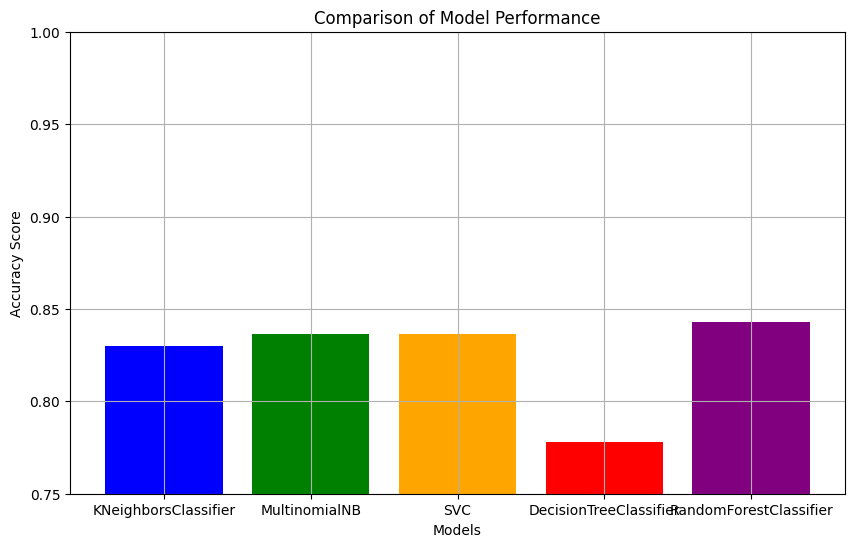

In [ ]:

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange', 'red', 'purple'])


plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Performance')
plt.ylim(0.75, 1)
plt.grid(True)
plt.show()

